In [1]:
import h5py
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame() # Make an empty data frame; you can also use a python dict here 

needed_keys = ['Etot','JR', 'Jphi', 'Jz', 'U', 'V', 'vr', 'W', 'vphi', 'XGC', 'YGC', 'ZGC'] # source_id is temporarily removed
with h5py.File('../../data/gaia/vel_err_orb_err_rvcorr_all.h5','r') as f:
    print(f.keys()) # Print what columns are in the file
    for key in needed_keys:
        df[key] = np.array(f[key])
print('initial length', len(df))
df = df.loc[np.isfinite(df['Etot'])]
df = df.loc[df['Etot']<0]
print('final length', len(df))
df.to_hdf('../../data/gaia/common_kinematics.h5', key='star')

<KeysViewHDF5 ['Etot', 'JR', 'Jphi', 'Jz', 'KE', 'Lx', 'Ly', 'Lz', 'PE', 'U', 'V', 'W', 'XGC', 'YGC', 'ZGC', 'apo', 'cov_UV', 'cov_UW', 'cov_VW', 'cov_vphiz', 'cov_vrphi', 'cov_vrz', 'e_Etot', 'e_JR', 'e_Jphi', 'e_Jz', 'e_KE', 'e_Lx', 'e_Ly', 'e_Lz', 'e_PE', 'e_U', 'e_V', 'e_W', 'e_XGC', 'e_YGC', 'e_ZGC', 'e_apo', 'e_ecc', 'e_peri', 'e_vphi', 'e_vr', 'e_vz', 'e_zmax', 'ecc', 'f_v_forder', 'parallax_zpcorr', 'peri', 'source_id', 'vphi', 'vr', 'vz', 'zero_point_correction', 'zmax']>
initial length 33812183
final length 31725506


In [3]:
df.head()

,Etot,e_Etot,JR,Jphi,Jz,KE,Lx,Ly,Lz,PE,ecc,peri,zmax,vr,vz,vphi,source_id
3,-129912.710271,2550.070211,19.527907,-1844.018219,0.076847,32705.927249,9.274515,-12.791122,-1844.018219,-162618.637520,0.113374,7132.992374,44.460766,8.476661,-1.693553,-256.241785,5937218444729627264
12,-116129.521791,1600.739215,87.863208,-2283.632715,14.659312,38137.430567,-83.855119,279.532118,-2283.632715,-154266.952358,0.229692,8176.550972,895.941822,33.966056,34.031080,-272.654733,2264885552539485440
15,-133164.824427,323.679646,25.303868,-1723.066234,0.474291,22849.968422,-23.725259,11.017816,-1723.066234,-156014.792848,0.144805,6448.735755,108.924331,-34.956364,0.887379,-211.039454,2268718484434583680
21,-125166.583355,1771.410185,6.877512,-2025.107026,4.045564,29599.360122,-80.059162,48.521084,-2025.107026,-154765.943477,0.064372,8290.214032,377.456591,-3.389265,5.414186,-243.848812,2269473745842498816
22,-135563.330455,876.082138,27.848565,-1621.707861,10.124721,19698.120953,-62.648255,-244.300844,-1621.707861,-155261.451407,0.154967,6052.901787,544.145945,2.398367,-30.011521,-195.754206,2269599601268930304


In [4]:
df.tail()

,Etot,e_Etot,JR,Jphi,Jz,KE,Lx,Ly,Lz,PE,ecc,peri,zmax,vr,vz,vphi,source_id
33812178,-124567.622783,738.702238,11.963395,-2045.298411,1.831560,31368.764548,-55.538875,23.590314,-2045.298411,-155936.387331,0.091346,8154.269944,246.788033,6.003987,2.690908,-250.246552,2257806724884479232
33812179,-135045.625215,410.372632,21.779246,-1665.751100,1.307560,21067.586705,-34.143744,-61.609248,-1665.751100,-156113.211921,0.136455,6275.015614,179.106576,17.739531,-7.324129,-204.371708,1633314288158556416
33812180,-110515.597398,1653.207163,12.773460,-2426.346988,212.479532,21845.616920,-881.815705,375.252036,-2426.346988,-132361.214318,0.078484,10712.464957,4412.914776,24.931716,-14.710598,-206.723571,1633309615234243968
33812181,-95614.361152,5888.268391,38.486031,-3217.241689,394.180684,21998.184743,-1270.649302,873.441560,-3217.241689,-117612.545895,0.117956,14244.572690,7362.317758,22.933817,-17.585816,-210.260253,2257792121995741568
33812182,-131721.550511,1840.669363,106.306432,-1290.163097,268.349130,14854.344346,-112.060675,901.426541,-1290.163097,-146575.894857,0.311992,4810.891216,3840.681865,59.997474,72.554249,-143.466187,4659721761610277120


In [5]:
import seaborn as sns

In [6]:
print(np.mean(df['KE'].to_numpy()))
print(np.std(df['KE'].to_numpy()))

25456.169391836094
8506.75920267078


In [7]:
print(np.min(df['KE']))
print(np.max(df['KE']))

16.802199433268758
215249.8062477052


<AxesSubplot: xlabel='Etot', ylabel='Count'>

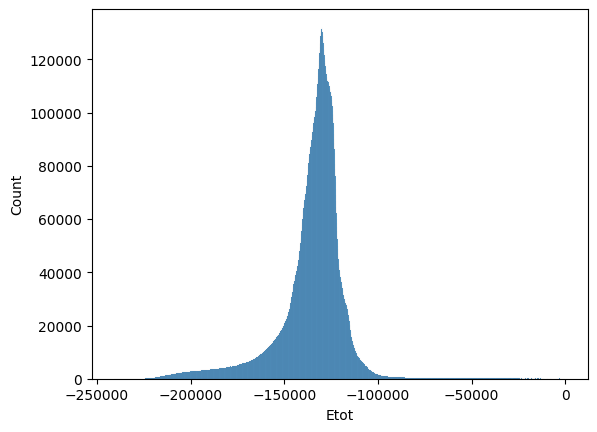

In [8]:
sns.histplot(data=df, x='Etot')